<a href="https://colab.research.google.com/github/rishabhrathore055/The_Sparks_Foundation_Tasks/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **GRIP : Graduate Rotational Internship Program**
## **The Sparks Foundadtion**
## **Data Science & Bussiness Analytics Intern** 

## **Author : Rishabh Rathore**
## **Task 4  : Exploratory Data Analysis -Terrorism**

**In This task We Perform ‘Exploratory Data Analysis’ on dataset "Global Terrorism" and try to findout the hot zone of terrorism.**

#**Importing Libraries**

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [94]:
data = pd.read_csv('/content/globalterrorism.csv',encoding='latin1',low_memory=True)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [95]:
#Find The Shape Of The DataSet
data.shape

(181691, 135)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [97]:
#Checking The no of Unique Values
data.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [98]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

###**Rename The Colums**

In [99]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','provstate':'states','region_txt':'Region','country_txt': 'Country',
                      'attacktype1_txt':'AttackType','nkill':'Killed','target1':'Target','nwound':'Wounded','gname':'GroupName',
                      'targtype1_txt':'Target_type','weaptype1_txt':'Weapontype','motive':'Motive'},inplace =True)

In [100]:
data.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,states,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,AttackType,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,...,weapsubtype4,weapsubtype4_txt,weapdetail,Killed,nkillus,nkillter,Wounded,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### There are Total 135 Columns in DataSet We Need Some Important Columns for finding the hot Zones rest of We Haved to drop out.

In [101]:
#In dataf assign Some Important Columns
dataf =data[['Year','Month','Day','Country','states','city','Region','AttackType','latitude','longitude','Killed','Wounded','Target','summary',
             'GroupName','Target_type','Weapontype','Motive']]
dataf.head(5)          

,Year,Month,Day,Country,states,city,Region,AttackType,latitude,longitude,Killed,Wounded,Target,summary,GroupName,Target_type,Weapontype,Motive
0,1970,7,2,Dominican Republic,NaN,Santo Domingo,Central America & Caribbean,Assassination,18.456792,-69.951164,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,Mexico city,North America,Hostage Taking (Kidnapping),19.371887,-99.086624,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Unknown,Southeast Asia,Assassination,15.478598,120.599741,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Athens,Western Europe,Bombing/Explosion,37.997490,23.762728,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,Fukouka,East Asia,Facility/Infrastructure Attack,33.580412,130.396361,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [102]:
dataf.shape

(181691, 18)

In [103]:
dataf.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
states            421
city              434
Region              0
AttackType          0
latitude         4556
longitude        4557
Killed          10313
Wounded         16311
Target            636
summary         66129
GroupName           0
Target_type         0
Weapontype          0
Motive         131130
dtype: int64

### **First We Have to Make Sure if There is Any Values in Day and Month as 0**

In [104]:
count = 0
for i in dataf['Day']:
  if i==0:
    count+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count)

Total Number Of Days Entred as 0 : 891


In [105]:
count2 = 0
for i in dataf['Month']:
  if i==0:
    count2+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count2)

Total Number Of Days Entred as 0 : 20


In [106]:
dataf['Day']= dataf['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
dataf['Month'] = dataf['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)

**Check For Days**

In [107]:
count = 0
for i in dataf['Day']:
  if i==0:
    count+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count)

Total Number Of Days Entred as 0 : 0


**Check For Months**

In [108]:
count2 = 0
for i in dataf['Month']:
  if i==0:
    count2+=1
  else:
    count=count
print("Total Number Of Days Entred as 0 :",count2)

Total Number Of Days Entred as 0 : 0


## **Find Missing Value Percentage**

In [109]:
def null_val(dataf):
    null_val = dataf.isnull().sum()
    null_val_p = 100 * dataf.isnull().sum()/len(dataf)
    null_val_ = pd.concat([null_val, null_val_p], axis =1)
    null_val_last = null_val_.rename(columns={0:'Null Values',1:'Percentage'})
    return null_val_last
null_val(dataf)    

,Null Values,Percentage
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
states,421,0.231712
city,434,0.238867
Region,0,0.000000
AttackType,0,0.000000
latitude,4556,2.507554
longitude,4557,2.508104


In [110]:
dataf.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
states            421
city              434
Region              0
AttackType          0
latitude         4556
longitude        4557
Killed          10313
Wounded         16311
Target            636
summary         66129
GroupName           0
Target_type         0
Weapontype          0
Motive         131130
dtype: int64

In [111]:
dataf['Motive'].fillna(value='NA',inplace=True)
dataf['summary'].fillna(value='NA',inplace=True)
dataf['city'].fillna(value='NA',inplace=True)
dataf['states'].fillna(value='NA',inplace=True)
dataf['longitude'].fillna(value='NA',inplace=True)
dataf['latitude'].fillna(value='NA',inplace=True)
dataf['Wounded'].fillna(value='NA',inplace=True)
dataf['Killed'].fillna(value='NA',inplace=True)
dataf['Target'].fillna(value='NA',inplace =True)

In [112]:
dataf.isnull().sum()

Year           0
Month          0
Day            0
Country        0
states         0
city           0
Region         0
AttackType     0
latitude       0
longitude      0
Killed         0
Wounded        0
Target         0
summary        0
GroupName      0
Target_type    0
Weapontype     0
Motive         0
dtype: int64

**Successfull Remove all the Null Values**

# **Data Visualization**

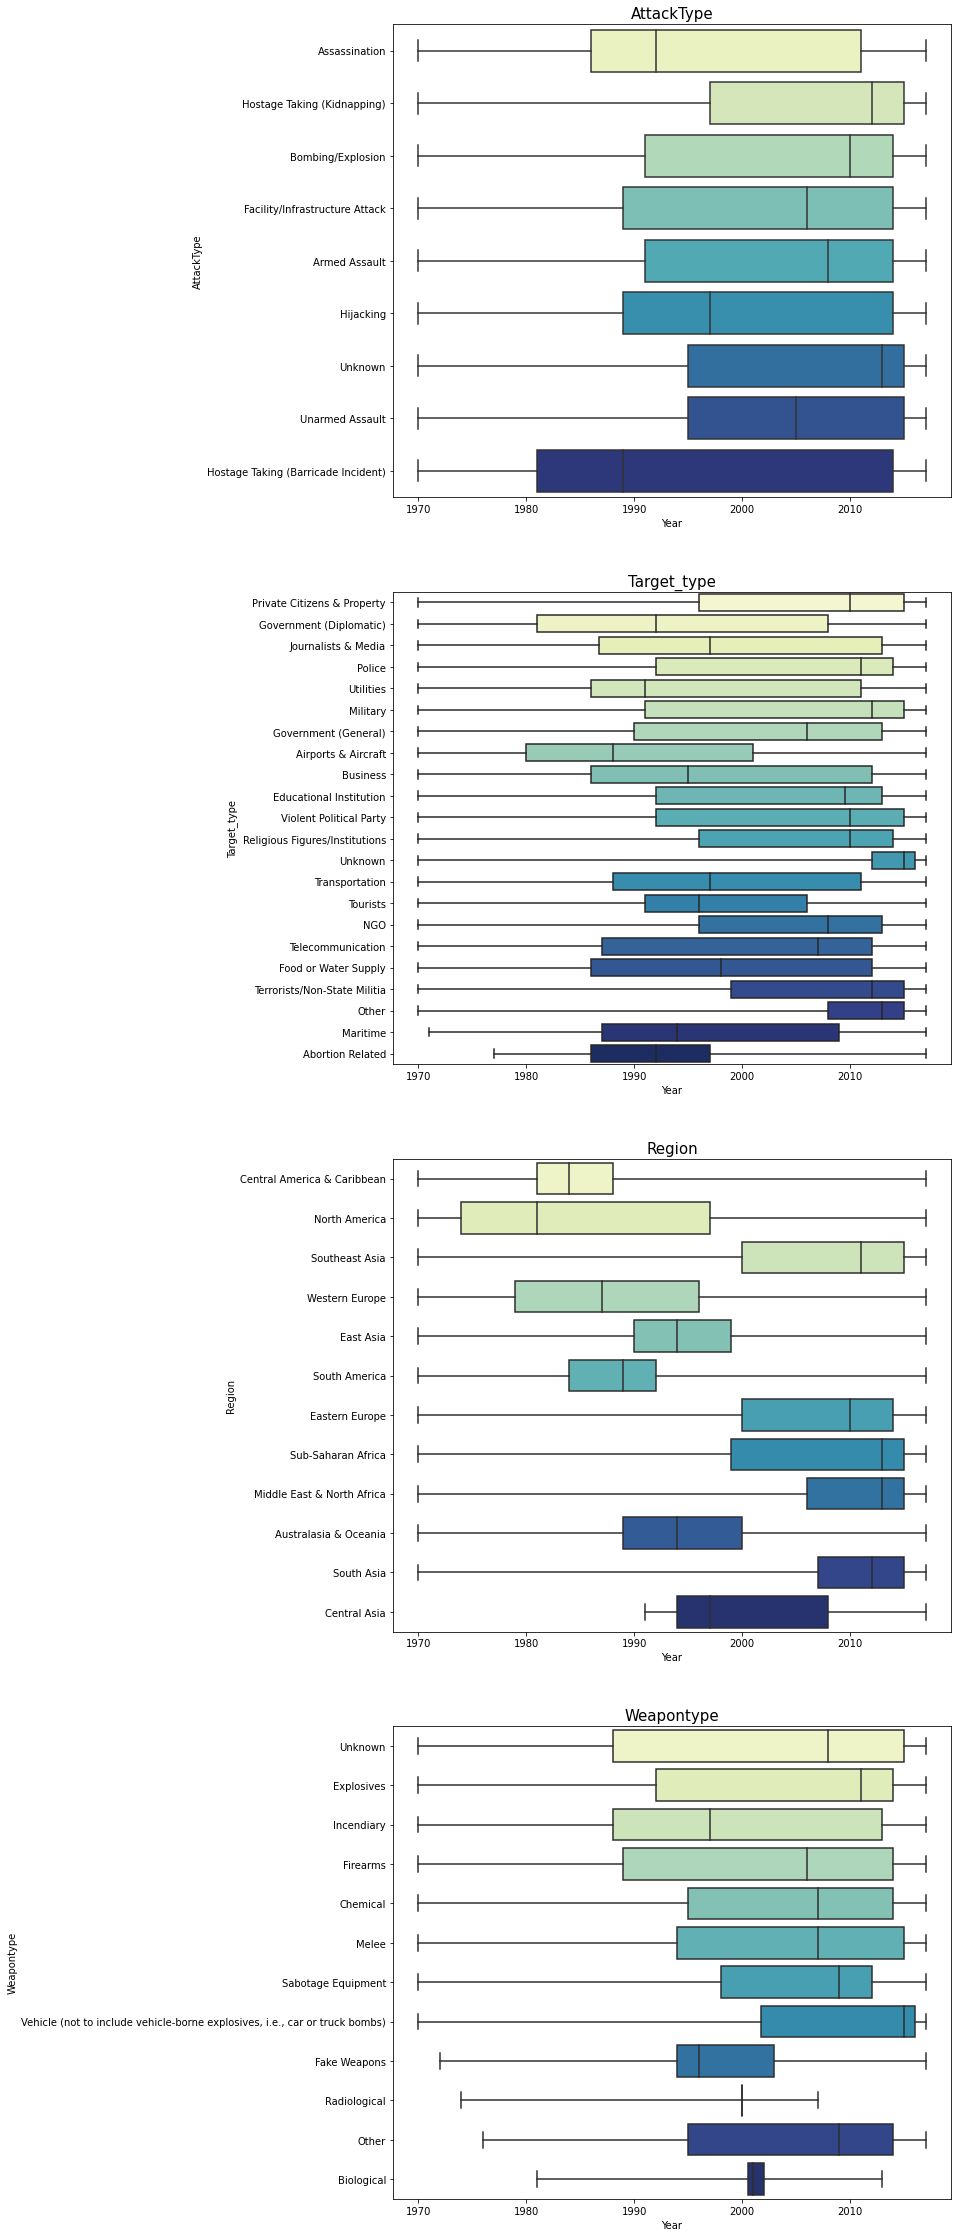

In [113]:
style ={'family':'Times New Roman','color':'black', 'size': 15}
dict = {'AttackType':1,'Target_type':2,'Region':3,'Weapontype':4}
plt.figure(figsize=(10,40))

for value, i in dict.items():
  plt.subplot(4,1,i)
  sns.boxplot(x="Year",y=value, data=dataf, whis=[0,100],palette="YlGnBu")
  plt.title(value,fontdict=style)
plt.show()  

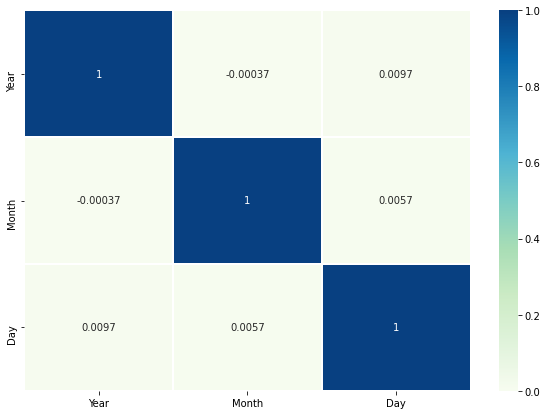

In [114]:
plt.figure(figsize=(10,7))
sns.heatmap(dataf.corr(),cmap="GnBu",annot = True, xticklabels ='auto', yticklabels='auto',linewidth=0.8)

# **Tracking Terrorist Activities**


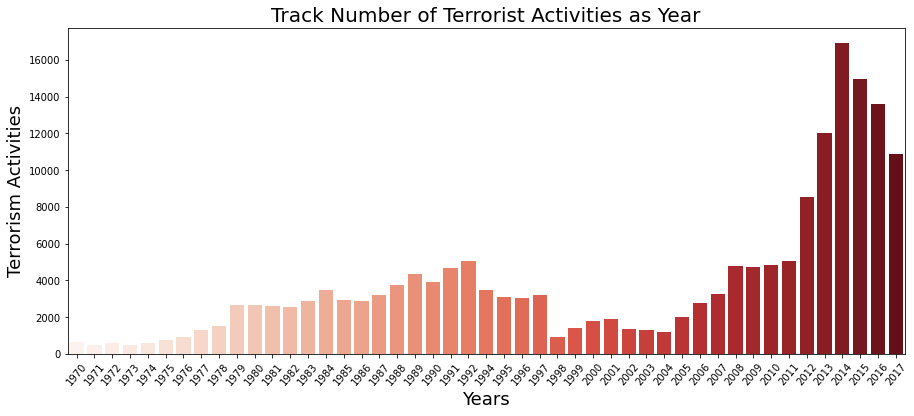

In [115]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=dataf,palette="Reds")
plt.xticks(rotation=50)
plt.xlabel('Years',size='18',color='black')
plt.ylabel('Terrorism Activities',size ='18',color = 'black')
plt.title('Track Number of Terrorist Activities as Year',size = '20',color = 'black')
plt.show()

* **The Terrorist Activities is rapidly increasing from 2004**
* **The Highest NUmber of Terrorist Activities in the year of 2014**
* **After 2014 Terrorist Activities is dcreasing**

****

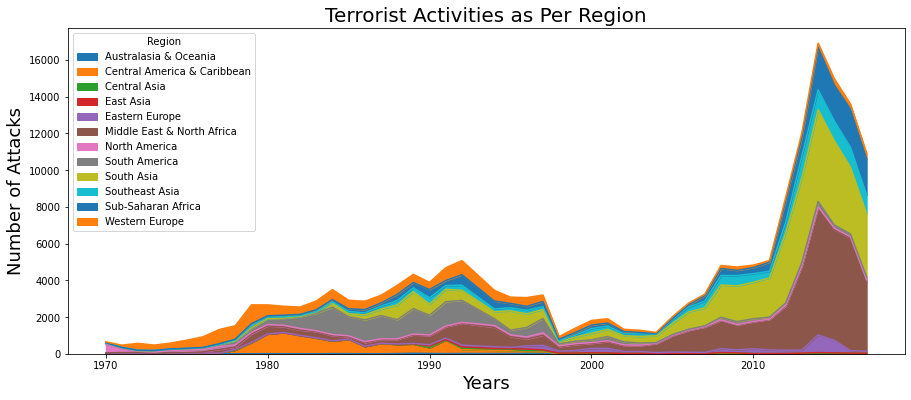

In [116]:
pd.crosstab(dataf.Year, dataf.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities as Per Region',size = '20',color = 'black')
plt.xlabel('Years',size='18',color='black')
plt.ylabel('Number of Attacks',size ='18',color = 'black')
plt.show()

 * **The Maximum Number of Terrorist Attacks in Centre America,followed by Australasia**
 * **The Least Number of Terrorist Attacks in East Asia and North America**

## **Top 10 Countries to be Affected By Terrorist Attacks**

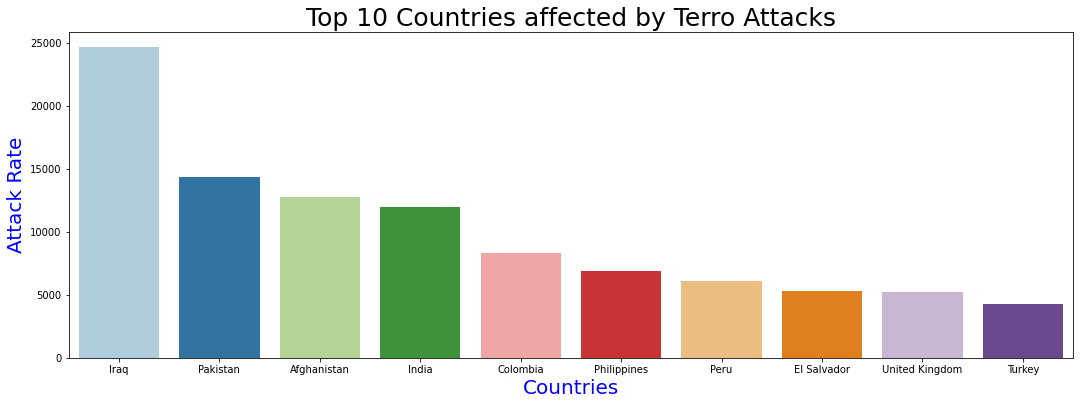

In [117]:
plt.subplots(figsize=(18,6))
plt.title('Top 10 Countries affected by Terro Attacks',size = '25', color='black')
sns.barplot(dataf['Country'].value_counts()[:10].index, dataf['Country'].value_counts()[:10].values,palette="Paired")
plt.xlabel('Countries',size ='20',color ='blue')
plt.ylabel('Attack Rate',size ='20',color ='blue')
plt.show()


## **Weapon Used With Respct To Reagion**

In [118]:
weapon_used = pd.crosstab(dataf['Weapontype'],dataf['Region'])
weapon_used

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Weapontype,,,,,,,,,,,,
Biological,0,0,0,2,0,1,24,1,2,0,3,2
Chemical,11,2,2,17,12,73,26,26,83,11,12,46
Explosives,80,3149,254,333,3089,32283,1557,9098,22568,5039,6319,8657
Fake Weapons,0,0,1,4,4,6,5,3,3,0,1,6
Firearms,74,5679,232,41,1461,11877,682,6525,15169,5634,7499,3651
Incendiary,74,435,15,252,186,1181,897,1077,2285,837,840,3056
Melee,10,65,14,82,90,1227,74,131,998,147,478,339
Other,1,0,0,3,4,23,18,6,16,4,19,20
Radiological,0,0,0,10,0,0,1,0,1,0,0,2


## **Evaluating**

In [119]:
print("Country with the Most Terrorist Attacks:",dataf['Country'].value_counts().idxmax())
print("Region with the Most Terrorist Attacks:",dataf['Region'].value_counts().idxmax())
print("City Have the Most Terrorist Attacks:",dataf['city'].value_counts().index[1])
print("Year with the Most Terrorist Attacks:",dataf['Year'].value_counts().idxmax())
print("Month with the Most Terrorist Attacks:",dataf['Month'].value_counts().idxmax())
print("Group with the Most Terrorist Attacks:",dataf['GroupName'].value_counts().index[1])
print("Most Target Types:",dataf['AttackType'].value_counts().index[1])
print("Most Target Types:",dataf['Target_type'].value_counts().idxmax())




Country with the Most Terrorist Attacks: Iraq
Region with the Most Terrorist Attacks: Middle East & North Africa
City Have the Most Terrorist Attacks: Baghdad
Year with the Most Terrorist Attacks: 2014
Month with the Most Terrorist Attacks: 5
Group with the Most Terrorist Attacks: Taliban
Most Target Types: Armed Assault
Most Target Types: Private Citizens & Property


# **Conclusion**
* **The Terrorist Activities is rapidly increasing from 2004**
* **The Highest NUmber of Terrorist Activities in the year of 2014**
* **After 2014 Terrorist Activities is dcreasing**
* **The Maximum Number of Terrorist Attacks in Centre America,followed by Australasia**
* **The Least Number of Terrorist Attacks in East Asia and North America**
* **Country with the Most Terrorist Attacks: Iraq**
* **Region with the Most Terrorist Attacks: Middle East & North Africa**
* **City Have the Most Terrorist Attacks: Baghdad**
* **Year with the Most Terrorist Attacks: 2014**
* **Month with the Most Terrorist Attacks: 5**
* **Group with the Most Terrorist Attacks: Taliban**
* **Most Target Types: Armed Assault**
* **Most Target Types: Private Citizens & Property**


# **Thankyou!!!**